In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Data was downloaded from CDC Wonder.
def parse_cdc(df):
    df = df[df.Notes.isnull()]
    df = df.drop('Notes', axis=1)
    df = df.replace('Suppressed', np.nan)
    
    df['Deaths'] = df['Deaths'].astype(float)
    
    df[['Deaths', 'Crude Rate', 'Age Adjusted Rate']] = df[['Deaths','Crude Rate', 'Age Adjusted Rate']].astype(float)

    return df

data_firearm = pd.read_csv('Underlying Cause of Suicide, 2017 (Firearm).txt', sep='\t')
data_other = pd.read_csv('Underlying Cause of Suicide, 2017 (Non-Firearm).txt', sep='\t')

data_firearm = parse_cdc(data_firearm)
data_other = parse_cdc(data_other)

data_suicide = pd.merge(data_firearm, data_other, how='outer', on=['State', 'State Code','Population'],
                suffixes=(' (Firearm)',' (Non-Firearm)'))

In [3]:
#Data was downloaded from the ATF.
data_owner = pd.read_csv('Registered Weapons by State, Apr 2017.csv')

data_owner['Guns'] = data_owner['Total'] - data_owner['Silencer']
data_owner = data_owner[['State', 'Guns']]

In [4]:
data = pd.merge(data_suicide, data_owner, how='outer', on=['State'])
data = data.dropna()
data['Crude Rate (Guns)'] = data['Guns'] * 100000/ data['Population']
data['% of Suicides (Firearm)'] = data['Deaths (Firearm)'] / (data['Deaths (Firearm)'] + data['Deaths (Non-Firearm)'])

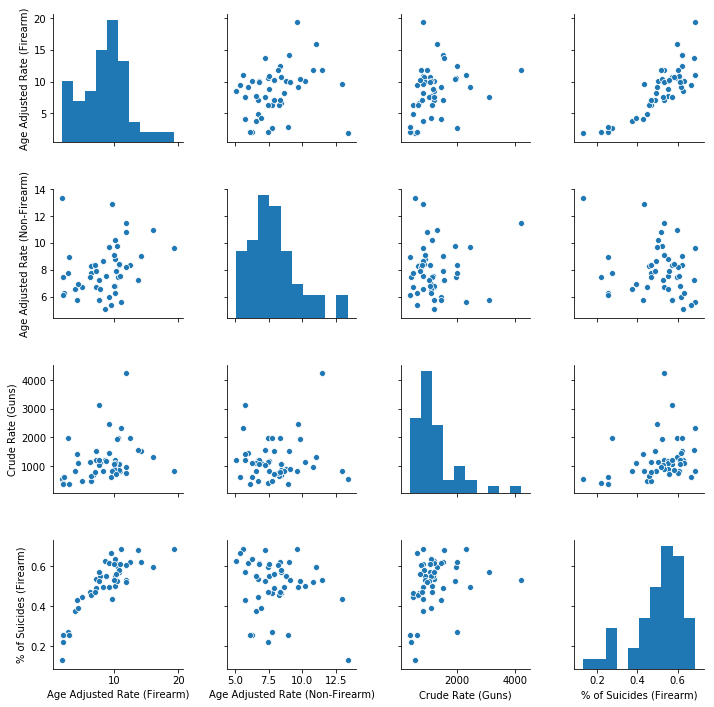

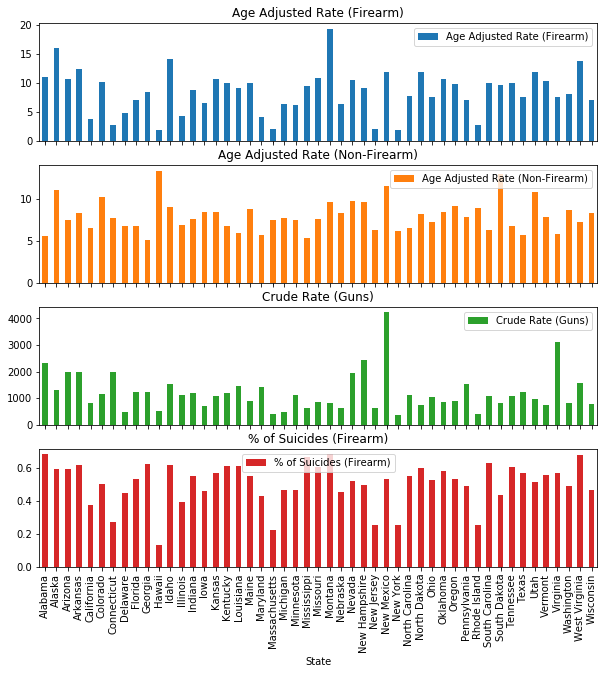

,Age Adjusted Rate (Firearm),Age Adjusted Rate (Non-Firearm),Crude Rate (Guns),% of Suicides (Firearm)
Age Adjusted Rate (Firearm),1.000000,0.255114,0.297036,0.841217
Age Adjusted Rate (Non-Firearm),0.255114,1.000000,0.060786,-0.219731
Crude Rate (Guns),0.297036,0.060786,1.000000,0.315840
% of Suicides (Firearm),0.841217,-0.219731,0.315840,1.000000


In [5]:
from scipy import stats

def display(df, variables, outliers=False):
    
    df_var = df[variables]
    
    if not outliers:
        threshold = (np.abs(stats.zscore(df_var)) < 3).all(axis=1)
        df = df[threshold]
        df_var = df_var[threshold]
       
    sns.pairplot(df_var)
    plt.show()
    
    df.plot.bar(x='State', y=variables, subplots=True, figsize=(10,10))
    plt.show()

    return df_var.corr()

variables = ['Age Adjusted Rate (Firearm)', 'Age Adjusted Rate (Non-Firearm)', 'Crude Rate (Guns)', 
             '% of Suicides (Firearm)']
display(data, variables)